# Importar Librarias y datos

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [91]:
df = pd.read_parquet("output_08.parquet")

In [92]:
df.head()

,age,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,gender_1.0,...,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged,income_above_limit_1.0
0,0.853333,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.00292,True,...,False,True,False,True,False,False,False,False,False,False
1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,True,...,True,True,False,True,False,False,True,False,True,False
2,0.080000,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.00000,False,...,True,True,False,True,False,False,True,False,True,False
4,0.733333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,False,...,False,True,False,True,False,False,False,False,False,False
5,0.400000,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.00000,False,...,False,False,False,False,False,False,True,False,True,False


# Modelo

In [94]:
df.columns

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'occupation_code', 'total_employed', 'gains', 'losses', 'stocks_status',
       'gender_1.0', 'education_secondary_complete',
       'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat_Other', 'househol

In [95]:
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical.columns

Index(['gender_1.0', 'education_secondary_complete',
       'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat_Other', 'household_stat_Otro', 'household_stat_Spouse',
       'tax_status_Joint both under 65', 'tax_status_Nonfiler',
       'tax_status_Otro', 'tax_status_Single', 'citi

# Dividir para entrenar

In [99]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['income_above_limit_1.0'])  # Features
y = df['income_above_limit_1.0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train modelo

In [101]:
# Primero comenzamos con un número aleatorio para comprobar que el modelo funciona.

K = 5
knn = KNeighborsClassifier(n_neighbors=K)  # Experiment with different values of K
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

K value: 5
Accuracy: 0.9244



In [102]:
# bucle for para probar diferentes valores n_neighbour

for K in range(2, 7):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

K value: 2
Accuracy: 0.9251

K value: 3
Accuracy: 0.9212

K value: 4
Accuracy: 0.9266

K value: 5
Accuracy: 0.9244

K value: 6
Accuracy: 0.9284



In [103]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 12):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.9251008979132122, 0.9211901260832838, 0.926633920470544, 0.9243813158965053, 0.9284172324249914, 0.9264149172480681, 0.9276663642336451, 0.9268216375183806, 0.927290930137972, 0.9269467822169384]


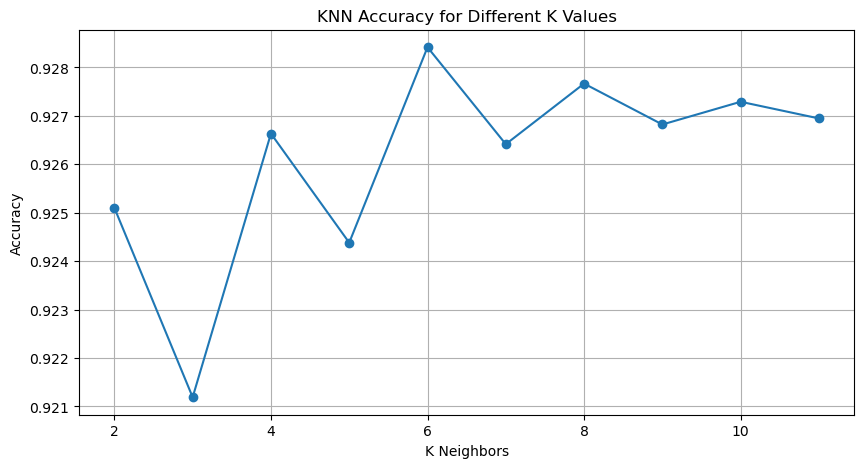

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 12), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

## Mirando ese grafico 6 es que sale con lo mejor presicion antes de la linea se aplane.

# Resultados

In [107]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 6  Accuracy: 0.9284


Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.99      0.96     29405
        True       0.64      0.25      0.36      2558

    accuracy                           0.93     31963
   macro avg       0.79      0.62      0.66     31963
weighted avg       0.91      0.93      0.91     31963



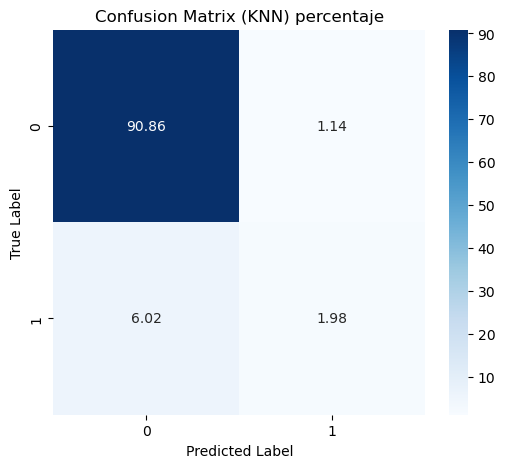

In [108]:
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum() * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN) percentaje')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()